# 3. 딥러닝 기본

## 3.1 딥러닝 개념

### 딥러닝 구현

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
num_classes = 10 
num_features = 784 

learning_rate = 0.001
training_steps = 3000
batch_size = 256
display_step = 100

n_hidden_1 = 128 
n_hidden_2 = 256 

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

In [4]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [5]:
random_normal = tf.initializers.RandomNormal()

weights = {
    'h1': tf.Variable(random_normal([num_features, n_hidden_1])),
    'h2': tf.Variable(random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.zeros([n_hidden_1])),
    'b2': tf.Variable(tf.zeros([n_hidden_2])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

In [6]:
def neural_net(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return tf.nn.softmax(out_layer)

In [7]:
def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

optimizer = tf.optimizers.SGD(learning_rate)

In [8]:
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)
        
    trainable_variables = list(weights.values()) + list(biases.values())

    gradients = g.gradient(loss, trainable_variables)
    
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [9]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 100, loss: 565.455688, accuracy: 0.132812
step: 200, loss: 402.773773, accuracy: 0.519531
step: 300, loss: 227.492310, accuracy: 0.746094
step: 400, loss: 159.752945, accuracy: 0.812500
step: 500, loss: 131.618973, accuracy: 0.839844
step: 600, loss: 130.207199, accuracy: 0.875000
step: 700, loss: 73.977280, accuracy: 0.933594
step: 800, loss: 89.658821, accuracy: 0.898438
step: 900, loss: 95.779022, accuracy: 0.894531
step: 1000, loss: 76.062759, accuracy: 0.914062
step: 1100, loss: 74.806831, accuracy: 0.910156
step: 1200, loss: 58.631344, accuracy: 0.960938
step: 1300, loss: 87.419701, accuracy: 0.910156
step: 1400, loss: 98.711388, accuracy: 0.894531
step: 1500, loss: 79.904114, accuracy: 0.910156
step: 1600, loss: 88.436455, accuracy: 0.894531
step: 1700, loss: 75.656532, accuracy: 0.917969
step: 1800, loss: 55.271095, accuracy: 0.949219
step: 1900, loss: 73.005005, accuracy: 0.906250
step: 2000, loss: 53.355164, accuracy: 0.921875
step: 2100, loss: 64.006050, accuracy: 0.94

In [10]:
pred = neural_net(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.933900


In [11]:
import matplotlib.pyplot as plt

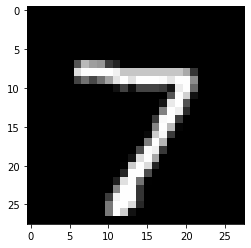

Model prediction: 7


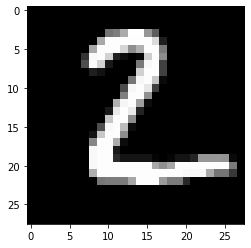

Model prediction: 2


In [12]:
n_images = 2
test_images = x_test[:n_images]
predictions = neural_net(test_images)

for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))